# Decision Trees

Decision trees are a simple yet extremey effective machine leaning model. This will be one of the shortest templates and notes but its power should not be undersestimated. Decision trees are also the building blocks of random forests. 

- Decision trees can perform both classification and regression.
- The primary algorithm used is CART(classification and regression trees).
- Decision trees <u> need little to no data prep </u>.
- Nodes in the decision tree have gini attributes. This is the measure of imprity within a node (usually a lef node).
- Sckit-learn uses CART which seperates  the set into two subsets using a single feature. 
- Cart makes the decision by analysing numerous options of k(the feature) and t (the threshold). It finds the set of (k,t) that produces the purest subsets.
- CART uses same logic recursively until it cannot find a split that increases te purity - or it reaches its (previouly set) limit of depth/splits. 
- CART is a greedy algorithm, therefore it does not think about the future splits and only optimizes the present split.It therefore does not ensure the split is optimal in the long run and does not complete optimise results. It usually, however, approximates to a very good job.
- Computational tmie is O(log2(m)) and therefore predictions are fast even at high volumes.
- Its possible to replace Gini impurity with entropy but the results rarelly differ and gini impurity is faster.
- Unrestrained decision trees will almost overfit, the best regulaization technique is to set a "max_depth" to the number of nodes. 
- min_sample_split, min_samples_leaf, min_weight_fraction are also useful and self-explanatory. 
- A node whos children are all leaf nodes is considered unneeded if the purity improvements are not statistically significant (usually conducted by X^2 (chi-squared).
- Decision trees can also be used for regression and the prediction will be the average of all the training examples associated with the class.
- Regression CART instead, therefore, tries t0 minimise MSE.
- Decision Trees can sometimes be unstable as the make decisions on orthoganal boundries. The most appropriate fix to this is to conduct some sort of dimensionality reduction before hand such as PCA.
- The biggest issue, however, is that they are very sensitive to small variations in training data.

### Example

In [26]:
import pandas as pd
import numpy
import sklearn
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


In [27]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [28]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
tree_clf.predict(X) # This is of course the same data, but it highlights the method 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

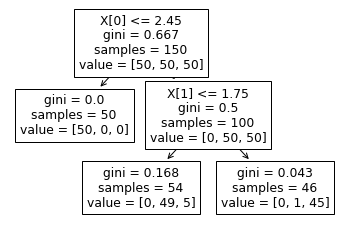

In [30]:
sklearn.tree.plot_tree(tree_clf)